# Twitter Tim Cook Data Analysis

In [21]:
# Packages:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from urllib.request import urlopen
import json
import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Pulling CSV with Twitter information. Check tim_cook.ipynb for data extraction
columns_chosed = ['created_at','full_text','id','source','favorite_count','retweet_count']

branson = pd.read_csv("data/branson.csv")
branson = branson[columns_chosed]

In [23]:
# Filtering Dataframe for tweets since 2019
branson["created_at"] = pd.to_datetime(branson["created_at"]).dt.date
branson["created_at"] = pd.to_datetime(branson["created_at"])
branson = branson[branson["created_at"]>='2019-01-01']
branson_df1 = branson.groupby("created_at").count().reset_index()
branson_df1 = branson_df1[["created_at",'full_text']]

branson_df2 = branson.groupby("created_at").sum().reset_index()
branson_df2 = branson_df2[['created_at','favorite_count','retweet_count']]
branson_df2

branson_df = branson_df1.merge(branson_df2,how='inner', on='created_at')
branson_df = branson_df.rename(columns={'full_text':'tweet_count'})
branson_df

,created_at,tweet_count,favorite_count,retweet_count
0,2019-03-10,4,1171.0,258.0
1,2019-03-11,8,1550.0,329.0
2,2019-03-12,10,2629.0,505.0
3,2019-03-13,7,1506.0,257.0
4,2019-03-14,9,2840.0,740.0
...,...,...,...,...
670,2021-11-24,1,803.0,104.0
671,2021-11-25,1,37.0,2.0
672,2021-11-28,1,334.0,42.0
673,2021-11-29,1,400.0,32.0


In [24]:
# Getting Data Stock prices. Source: Yahoo Finance.
apple_stock = pd.read_csv("data/AAPL.csv")
apple_stock_df = apple_stock[['Date','Close']]

# Calculating Stock Price Variation
apple_stock_df['var'] = apple_stock_df['Close']
# Approach 1:
# apple_stock_df['price_change'] = apple_stock_df['Close'].pct_change()
# Approach 2:
# for i in range(len(apple_stock_df)-1):
#     apple_stock_df['var'].iloc[i+1]= np.log(apple_stock_df['Close'].iloc[i]/apple_stock_df['Close'].iloc[i+1])
# Approach 3:
apple_stock_df['var']= np.log(apple_stock_df['Close']/apple_stock_df['Close'].shift())
apple_stock_df

,Date,Close,var
0,2019-01-02,39.480000,NaN
1,2019-01-03,35.547501,-0.104924
2,2019-01-04,37.064999,0.041803
3,2019-01-07,36.982498,-0.002228
4,2019-01-08,37.687500,0.018884
...,...,...,...
730,2021-11-23,161.410004,0.002419
731,2021-11-24,161.940002,0.003278
732,2021-11-26,156.809998,-0.032191
733,2021-11-29,160.240005,0.021638


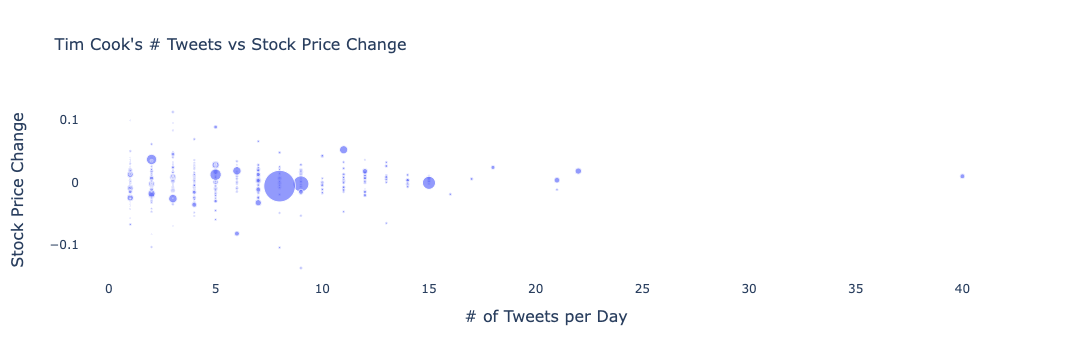

In [25]:
fig = go.Figure()
_ = fig.add_trace(go.Scatter(
    x= branson_df['tweet_count'],
    y= apple_stock_df['var'],
    mode="markers",
    marker={"size": branson_df['favorite_count'], "sizemode": "area",
                                    "sizeref": 2*max(branson_df['favorite_count']/1000)},
    hovertemplate= "Number of Tweets per Day: %{x:.1f}<br>" +
    "Stock Price Change: %{y:.1f}<br>" +
    "Number of Likes: %{marker.size:,}" +
    "<extra></extra>"
))
fig.update_layout(
    plot_bgcolor="white",
    yaxis={"title": {"text": "Stock Price Change", "font": {"size": 16}}},
    xaxis={"title": {"text": "# of Tweets per Day", "font": {"size": 16}}},
    # hovermode="x",
    title={'text': "Tim Cook's # Tweets vs Stock Price Change", "font": {"size": 16}}
)
fig.show()

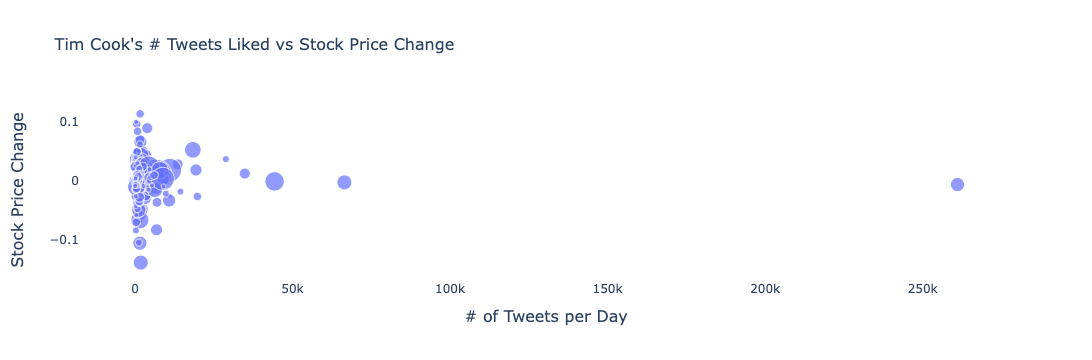

In [26]:
fig = go.Figure()
_ = fig.add_trace(go.Scatter(
    x= branson_df['favorite_count'],
    y= apple_stock_df['var'],
    mode="markers",
    marker={"size": branson_df['tweet_count'], "sizemode": "area",
                                    "sizeref": 2*max(branson_df['tweet_count']/1000)},
    hovertemplate= "Number of Tweets Liked per Day: %{x:.1f}<br>" +
    "Stock Price Change: %{y:.1f}<br>" +
    "Number of Likes: %{marker.size:,}" +
    "<extra></extra>"
))
fig.update_layout(
    plot_bgcolor="white",
    yaxis={"title": {"text": "Stock Price Change", "font": {"size": 16}}},
    xaxis={"title": {"text": "# of Tweets per Day", "font": {"size": 16}}},
    # hovermode="x",
    title={'text': "Tim Cook's # Tweets Liked vs Stock Price Change", "font": {"size": 16}}
)
fig.show()

## Sentimental Analysis

In [27]:
import re

# Clean The Data
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    
    return text

In [28]:
# Clean The Text
branson['full_text'] = branson['full_text'].apply(cleantext)
branson.head()

,created_at,full_text,id,source,favorite_count,retweet_count
0,2021-11-30,These _unhcr decorations are handmade by refug...,1465791091907698697,"<a href=""http://twitter.com/download/iphone"" r...",163,51
1,2021-11-29,Thank you for the wonderful tribute,1465338314580443148,"<a href=""https://mobile.twitter.com"" rel=""nofo...",400,32
2,2021-11-28,It’s that time of year again – feels like it h...,1464922302542487554,"<a href=""https://studio.twitter.com"" rel=""nofo...",334,42
3,2021-11-25,I wouldn’t want to be anywhere else!,1463914460297445387,"<a href=""https://mobile.twitter.com"" rel=""nofo...",37,2
4,2021-11-24,This is the moment we told Keisha Schahaff she...,1463524912459657219,"<a href=""https://studio.twitter.com"" rel=""nofo...",803,104


In [29]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds['full_text']).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
branson[["subjectivity", "polarity"]] = branson.apply(sentiment_analysis, axis=1)

In [39]:
#Polarity Change
branson["polarity_chg"] = branson["polarity"]
branson["polarity_chg"] = np.log(branson["polarity"]/branson["polarity"].shift())
branson # Need to include the Nan replacement!

,created_at,full_text,id,source,favorite_count,retweet_count,subjectivity,polarity,polarity_chg
0,2021-11-30,These _unhcr decorations are handmade by refug...,1465791091907698697,"<a href=""http://twitter.com/download/iphone"" r...",163,51,0.75,0.716667,NaN
1,2021-11-29,Thank you for the wonderful tribute,1465338314580443148,"<a href=""https://mobile.twitter.com"" rel=""nofo...",400,32,1.00,1.000000,0.333144
2,2021-11-28,It’s that time of year again – feels like it h...,1464922302542487554,"<a href=""https://studio.twitter.com"" rel=""nofo...",334,42,0.60,0.538889,-0.618246
3,2021-11-25,I wouldn’t want to be anywhere else!,1463914460297445387,"<a href=""https://mobile.twitter.com"" rel=""nofo...",37,2,0.00,0.000000,-inf
4,2021-11-24,This is the moment we told Keisha Schahaff she...,1463524912459657219,"<a href=""https://studio.twitter.com"" rel=""nofo...",803,104,0.00,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
3244,2019-03-11,Building industry out of adversity: how the bu...,1105015678027948032,"<a href=""https://www.hootsuite.com"" rel=""nofol...",227,23,0.55,-0.400000,NaN
3245,2019-03-10,“You shouldn’t have to decide whether you make...,1104758936601837570,"<a href=""https://www.hootsuite.com"" rel=""nofol...",193,32,0.60,0.700000,NaN
3246,2019-03-10,"“If you don’t stand for something, you’ll fall...",1104728741631197190,"<a href=""https://www.hootsuite.com"" rel=""nofol...",297,55,0.90,0.500000,-0.336472
3247,2019-03-10,. created a ‘sainting ceremony’ with the help ...,1104698513911410690,"<a href=""https://www.hootsuite.com"" rel=""nofol...",190,37,0.75,0.375000,-0.287682


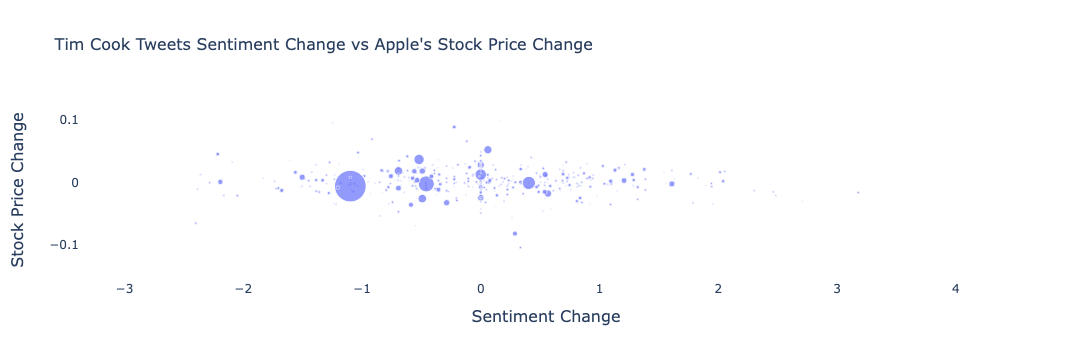

In [36]:
fig = go.Figure()
_ = fig.add_trace(go.Scatter(
    x= branson["polarity_chg"],
    y= apple_stock_df['var'],
    mode="markers",
    marker={"size": branson_df['favorite_count'], "sizemode": "area",
                                    "sizeref": 2*max(branson_df['favorite_count']/1000)},
    hovertemplate= "Polarity of Tweets: %{x:.1f}<br>" +
    "Stock Price Change: %{y:.1f}<br>" +
    "Number of Likes: %{marker.size:,}" +
    "<extra></extra>"
))
fig.update_layout(
    plot_bgcolor="white",
    # hovermode="x",
    xaxis={"title": {"text": "Sentiment Change", "font": {"size": 16}}},
    yaxis={"title": {"text": "Stock Price Change", "font": {"size": 16}}},
    title={'text': "Tim Cook Tweets Sentiment Change vs Apple's Stock Price Change", "font": {"size": 16}}
)
fig.show()

## Word Clound

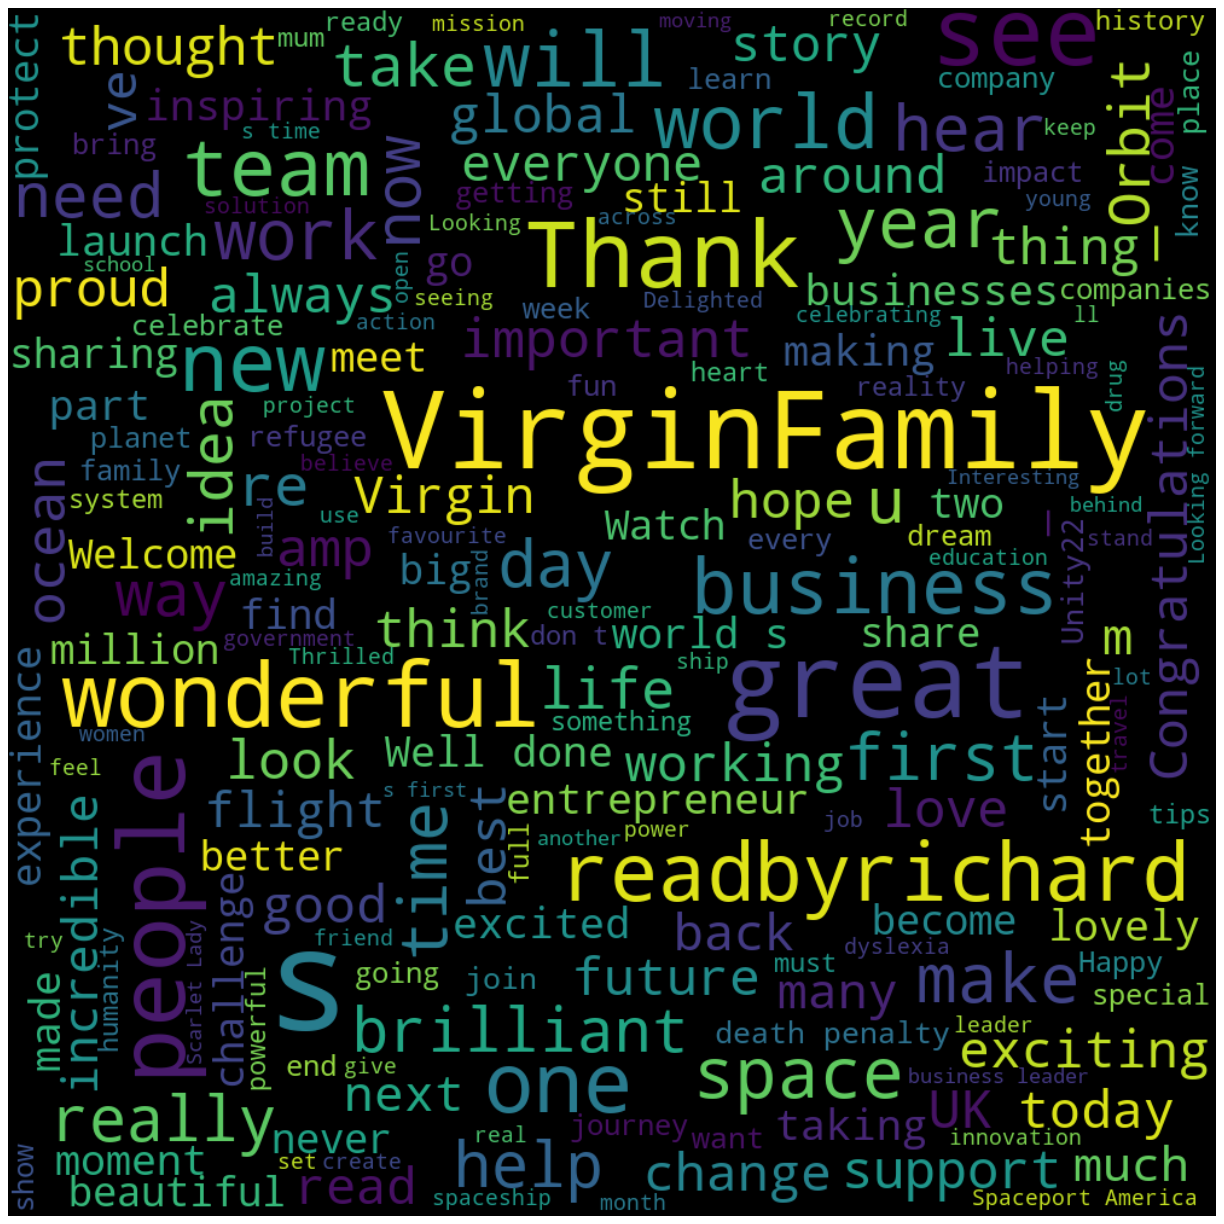

In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([twts for twts in branson['full_text']])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()